# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'two-classes'

data_config = {
  "data_unit" : sup.DATA_S_PV,
  "seq_len" : 12,
  "PH2" : False,
  "n" : 72,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 16,
}

train_config = {
  "device" : bert.device,
  "arch" : sup.TRAIN_BERT_CODE,
  "loadable" : bert.DISTILBERT,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 90
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.fit(verbose=True)

In [7]:
model.test()
model.full_score()

/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:192: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()


1.0
1
1.0
1.0
1.0


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:234: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


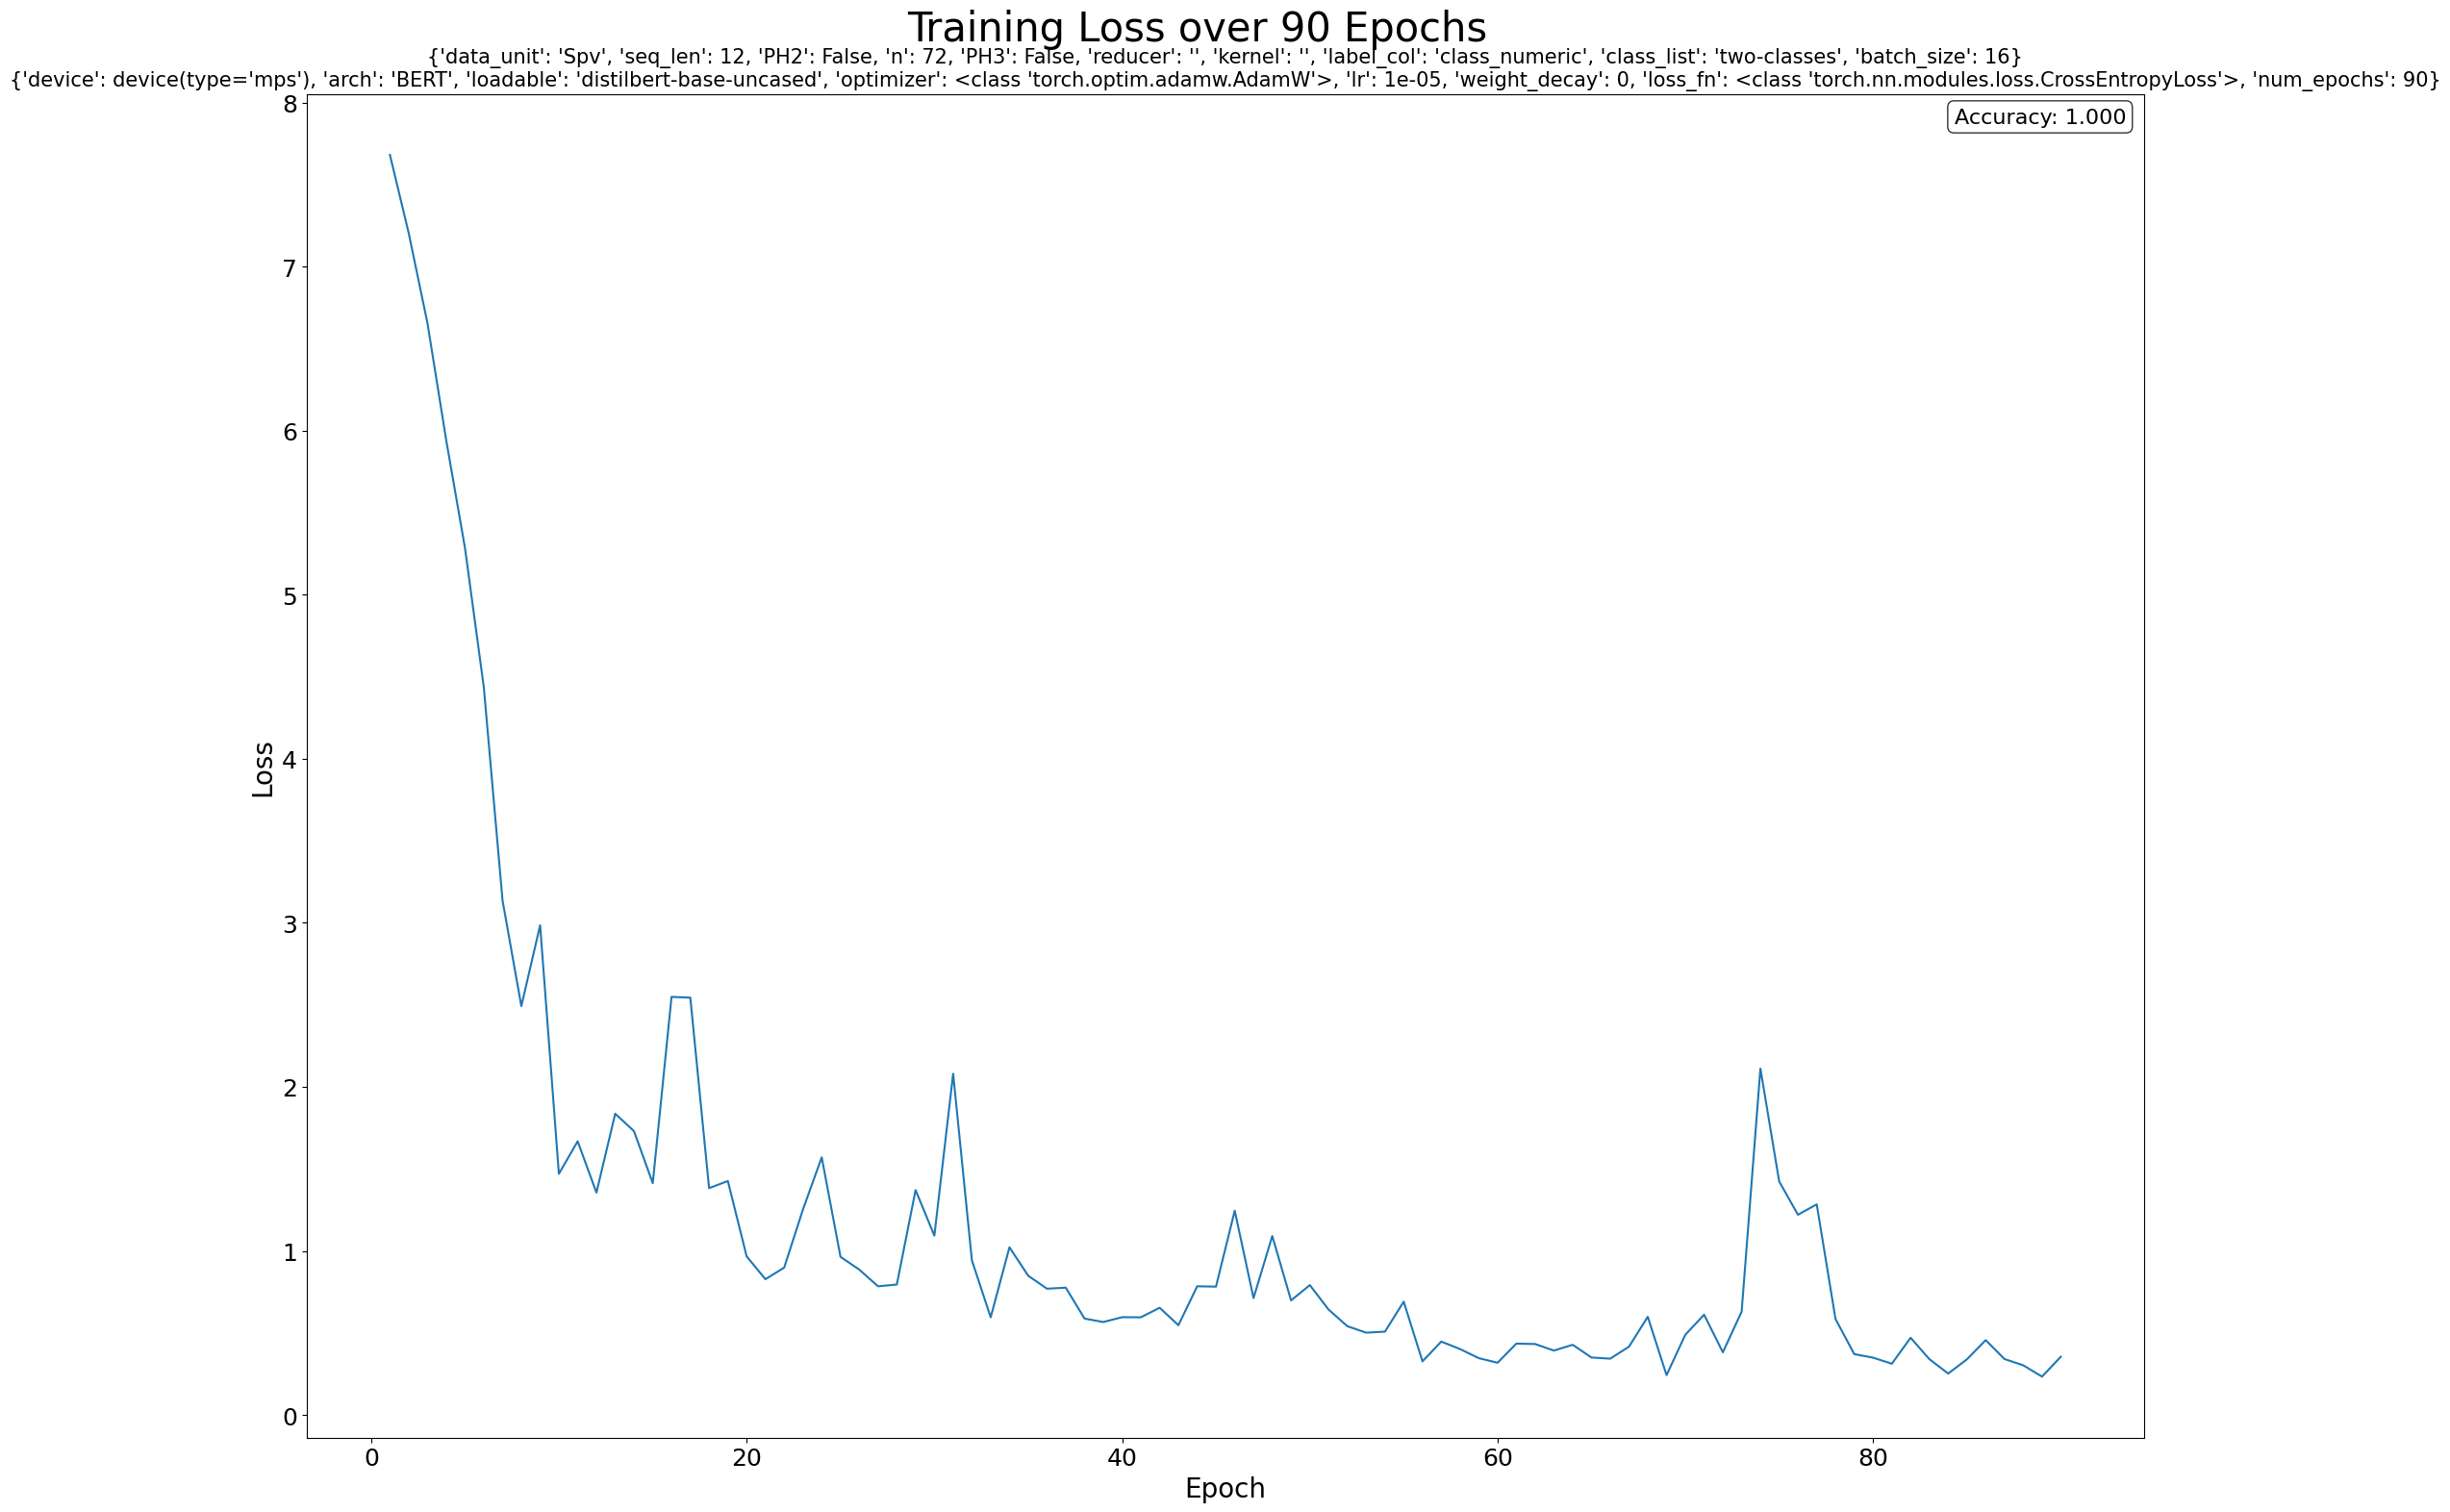

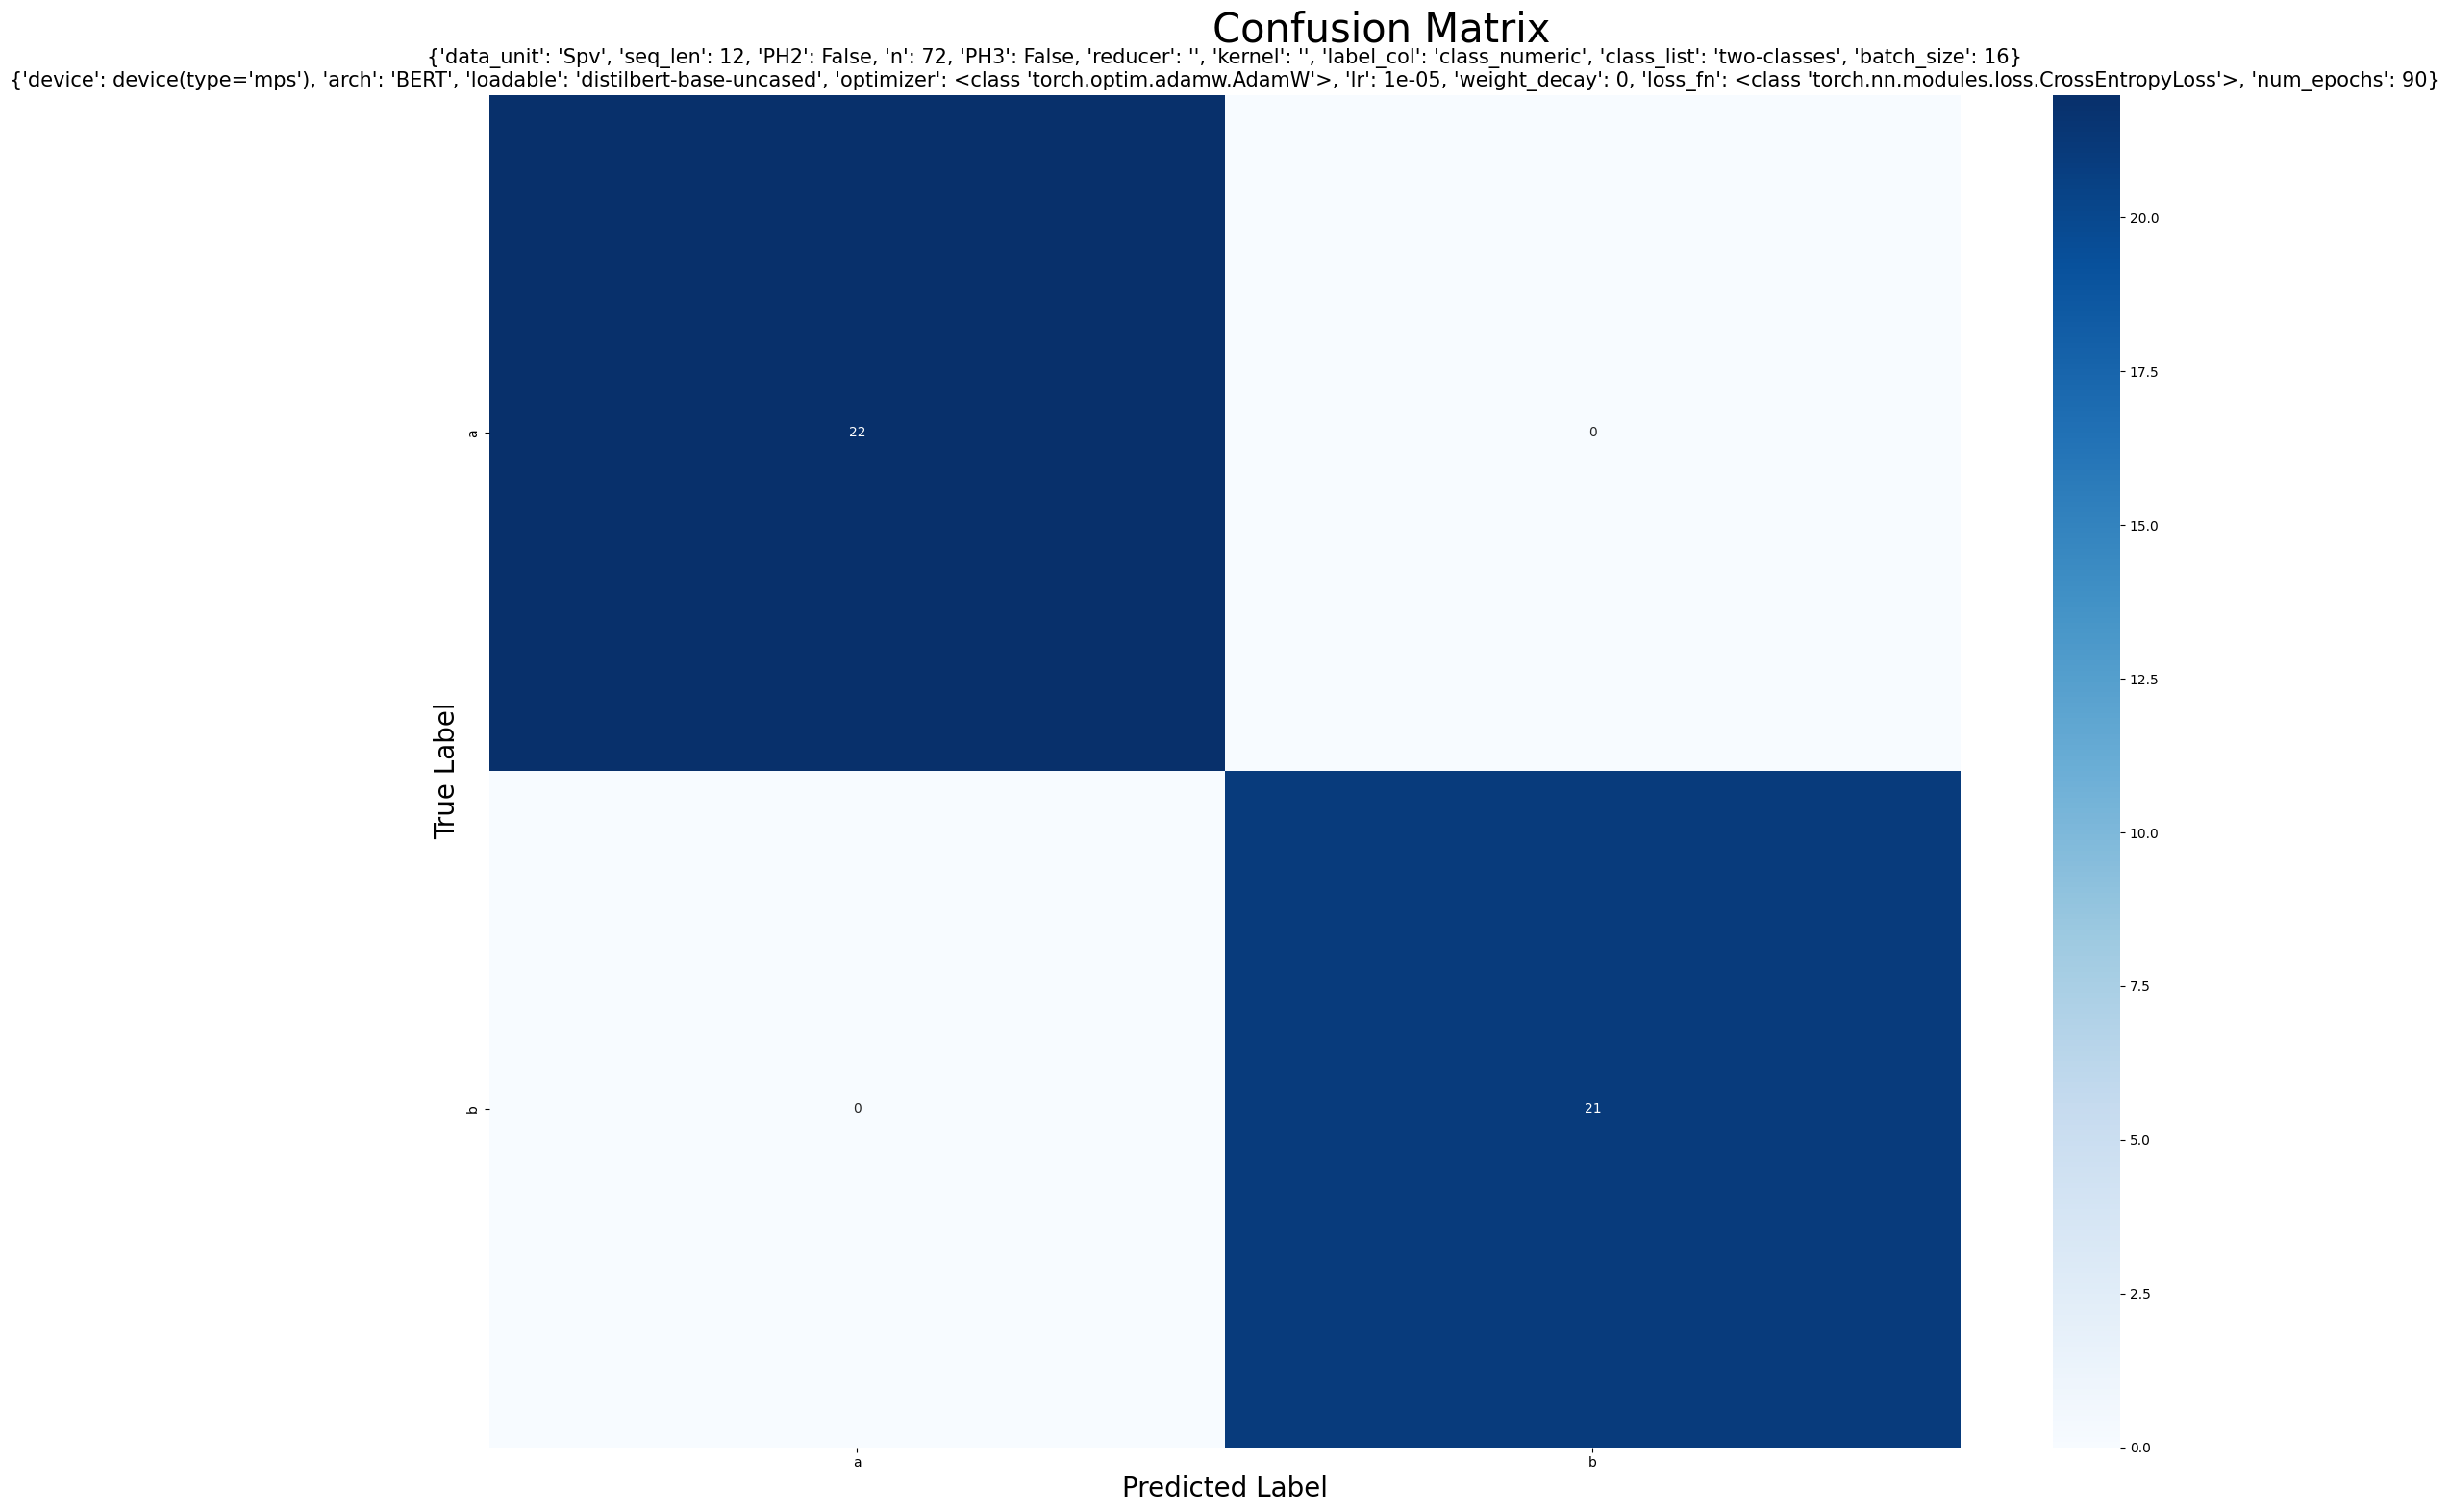

In [8]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

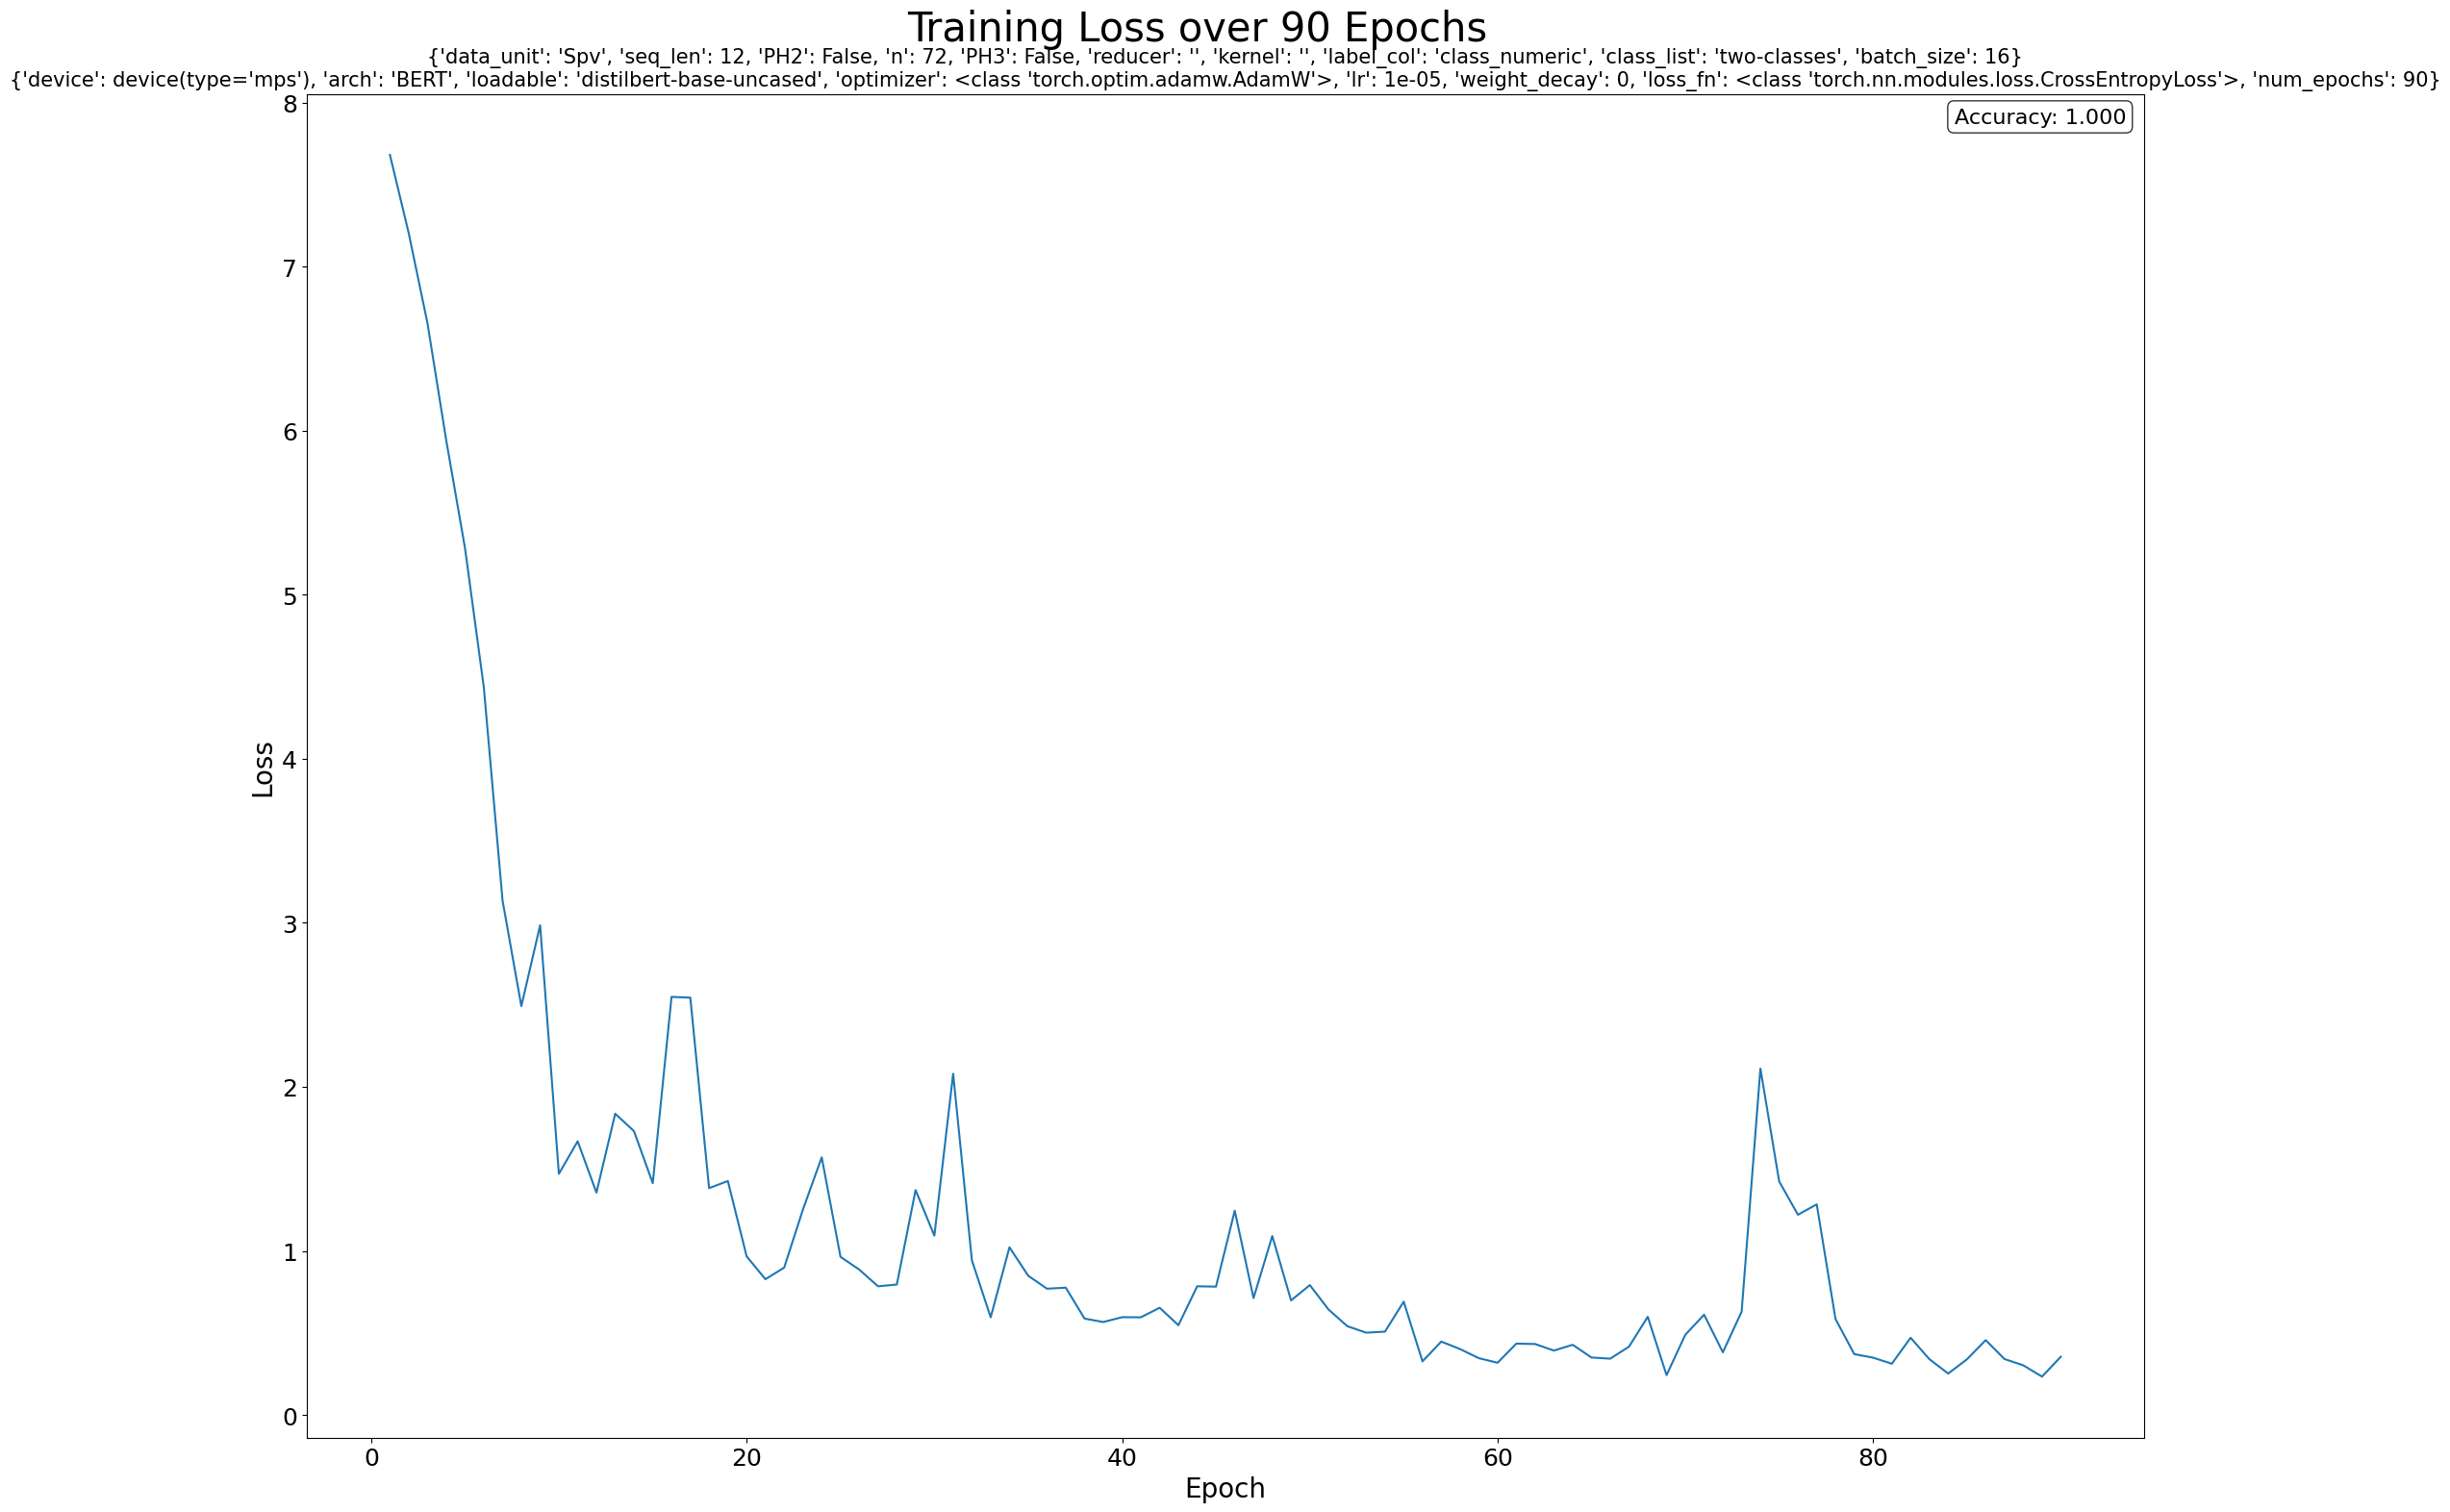

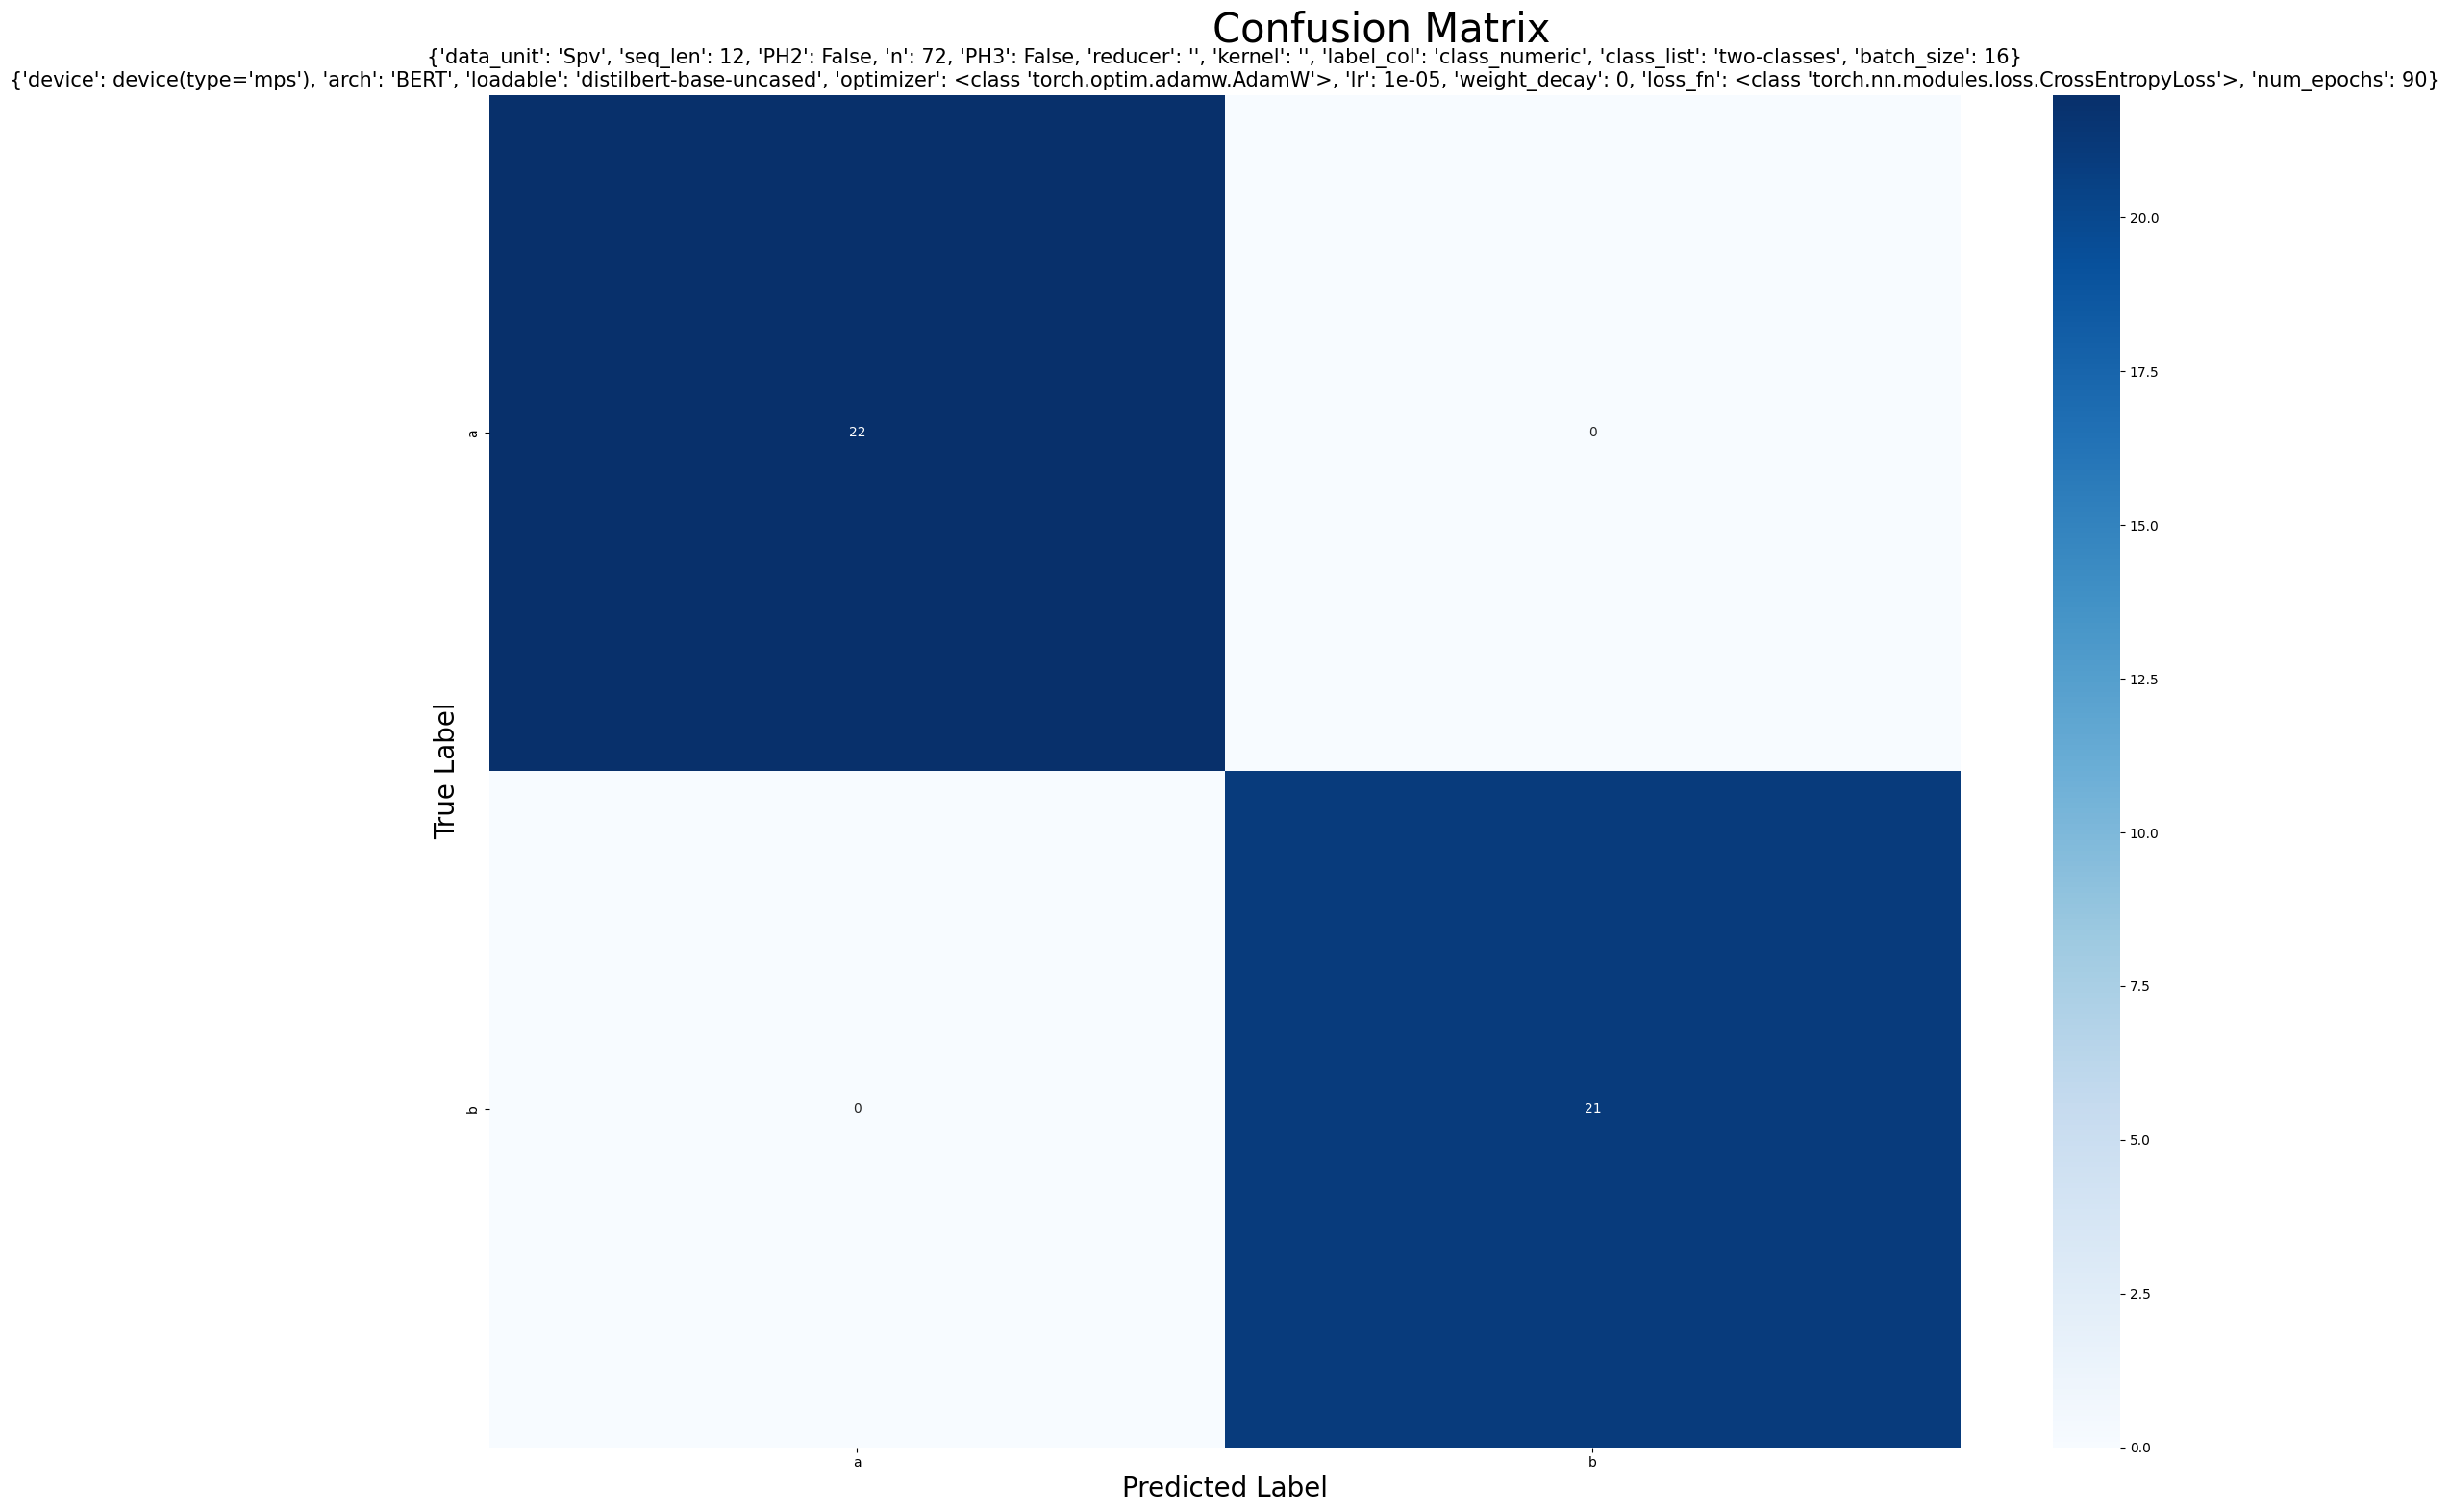

In [9]:
model.keep()
#bert.clean_bert()